In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer

In [12]:
dru = pd.read_csv('newDrug.csv.gz')
dru.info()
dru.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215063 entries, 0 to 215062
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              215063 non-null  int64  
 1   ID                      215063 non-null  int64  
 2   review                  215063 non-null  object 
 3   cleanReview             215063 non-null  object 
 4   rating                  215063 non-null  float64
 5   rating Sentiment        215063 non-null  int64  
 6   rating Sentiment Label  215063 non-null  object 
 7   Review Score            215063 non-null  float64
 8   vaderSentiment          215063 non-null  int64  
 9   vader Sentiment Label   215063 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 16.4+ MB


,Unnamed: 0,ID,review,cleanReview,rating,rating Sentiment,rating Sentiment Label,Review Score,vaderSentiment,vader Sentiment Label
0,0,206461,"""It has no side effect, I take it in combinati...","""It side effect, I take combination Bystolic 5...",9.0,2,positive,0.0000,0,neutral
1,1,95260,"""My son is halfway through his fourth week of ...","""My son halfway fourth week Intuniv. We became...",8.0,2,positive,0.9070,2,positive
2,2,92703,"""I used to take another oral contraceptive, wh...","""I used take another oral contraceptive, 21 pi...",5.0,0,neutral,0.7096,2,positive
3,3,138000,"""This is my first time using any form of birth...","""This first time using form birth control. I&#...",8.0,2,positive,0.7184,2,positive
4,4,35696,"""Suboxone has completely turned my life around...","""Suboxone completely turned life around. I fee...",9.0,2,positive,0.9403,2,positive


In [13]:
dru = dru.drop(columns=dru.columns[0])
dru.head()

,ID,review,cleanReview,rating,rating Sentiment,rating Sentiment Label,Review Score,vaderSentiment,vader Sentiment Label
0,206461,"""It has no side effect, I take it in combinati...","""It side effect, I take combination Bystolic 5...",9.0,2,positive,0.0000,0,neutral
1,95260,"""My son is halfway through his fourth week of ...","""My son halfway fourth week Intuniv. We became...",8.0,2,positive,0.9070,2,positive
2,92703,"""I used to take another oral contraceptive, wh...","""I used take another oral contraceptive, 21 pi...",5.0,0,neutral,0.7096,2,positive
3,138000,"""This is my first time using any form of birth...","""This first time using form birth control. I&#...",8.0,2,positive,0.7184,2,positive
4,35696,"""Suboxone has completely turned my life around...","""Suboxone completely turned life around. I fee...",9.0,2,positive,0.9403,2,positive


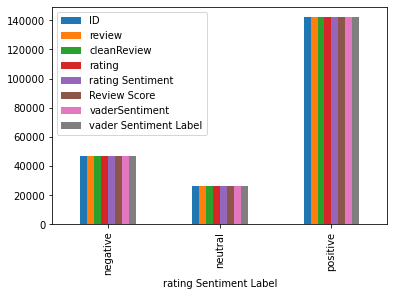

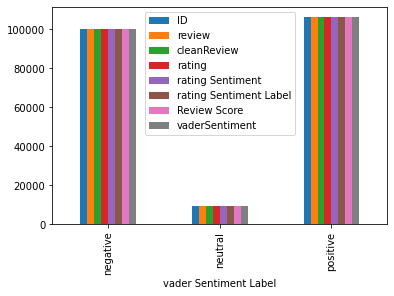

In [14]:
dru.groupby('rating Sentiment Label').count().plot.bar()
plt.show()
dru.groupby('vader Sentiment Label').count().plot.bar()
plt.show()

In [15]:
tfidf = TfidfVectorizer(stop_words='english',ngram_range=(1,2))
features = tfidf.fit_transform(dru.cleanReview)
labels   = dru.vaderSentiment
features.shape

(215063, 1619394)

In [18]:
x_train,x_test,y_train,y_test = train_test_split(dru['cleanReview'],dru['rating Sentiment Label'],random_state=0)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

# svc = LinearSVC()
Logistic=LogisticRegression(random_state=0,solver='lbfgs',max_iter=1500,multi_class='auto')
model = [Logistic]
CV = 5
cv_dru = pd.DataFrame(index=range(CV * len(model)))
entries = []
for model in model:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model,features,labels,scoring='accuracy',cv=CV)
  for fold_idx,accuracy in enumerate(accuracies):
    entries.append((model_name,fold_idx,accuracy))
cv_dru = pd.DataFrame(entries,columns=['model_name','fold_idx','accuracy'])

cv_dru

,model_name,fold_idx,accuracy
0,LogisticRegression,0,0.901658
1,LogisticRegression,1,0.902727
2,LogisticRegression,2,0.902332
3,LogisticRegression,3,0.903399
4,LogisticRegression,4,0.902469


In [20]:
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score 
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size= 0.25,random_state=0)
normal = Normalizer()
x_train = normal.fit_transform(x_train)
x_test = normal.fit_transform(x_test)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print(accuracy_score(y_test,y_pred))

0.8974444816426738


In [23]:
from sklearn.metrics import confusion_matrix,classification_report
# from mlxtend.plotting import plot_confusion_matrix


matrix = confusion_matrix(y_test,y_pred)
matrix

# fig,x = plot_confusion_matrix(matrix=matrix,colorbar=True,show_absolute=True,cmap='viridis')

print(classification_report(y_test,y_pred,target_names=dru['rating Sentiment Label'].unique()))

              precision    recall  f1-score   support

    positive       0.97      0.21      0.34      2307
     neutral       0.90      0.92      0.91     24910
    negative       0.89      0.93      0.91     26549

    accuracy                           0.90     53766
   macro avg       0.92      0.69      0.72     53766
weighted avg       0.90      0.90      0.89     53766



In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [ ]:

x_train, x_test, y_train, y_test = train_test_split(features,labels, test_size=0.20, random_state = 0,)     